In [210]:
# install the necessary libraries
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [211]:
# open the label me software application
!labelme

In [212]:
# import the necessary libraries
import tensorflow as tf
import json 
import numpy as np
from matplotlib import pyplot as plt

2023-04-23 06:15:01.558223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [213]:
# at the starting of the implementation of the object localisation step, all the dataset images were in the images folder.
# this lines stores all the images in the folder in order.
images = tf.data.Dataset.list_files('data/images/*.png', shuffle=False)

2023-04-23 06:15:10.384447: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [216]:
# returns the first image in the 'images' variable
images.as_numpy_iterator().next()

b'data/images/00000.png'

In [3]:
# a function to return an image
def load_image(x):
    # first reads the file
    byte_img = tf.io.read_file(x)
    # then converts it to a RGB coloured image
    img = tf.io.decode_png(byte_img, channels=3)
    return img

In [218]:
# map function applies the input method to all elements in the variable
images = images.map(load_image)

In [219]:
# returns the first element in the 'images' variable
images.as_numpy_iterator().next()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [223]:
# assigns the next 4 images each time running this cell
image_generator = images.batch(4).as_numpy_iterator()

In [224]:
# gets the 4 images
plot_images = image_generator.next()

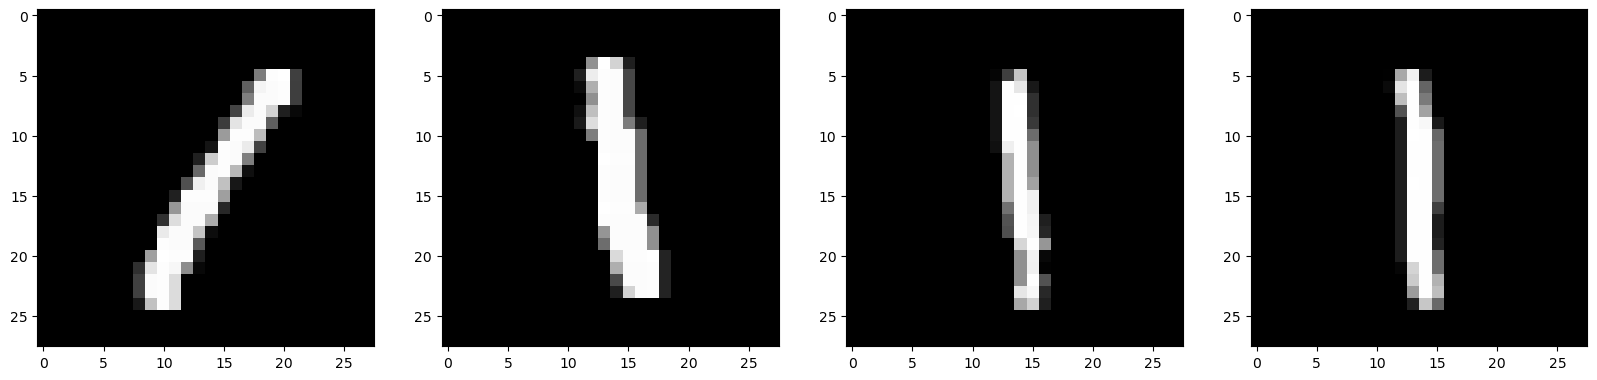

In [225]:
# shows the 4 images
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [226]:
# the seperation of the data is done manually. For the training data there are 126 images. For the testing data there are 28 images
# For the validation data there are 26 images.
# This cell places the label data to correct folders.
import os
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [227]:
# a library for doing the augmentation
import albumentations as alb

In [228]:
# no extra augmentation is applied to the images other than using the class label as bounding box parameter.
augmentor = alb.Compose([], bbox_params = alb.BboxParams(format='albumentations', label_fields=['class_labels']))

In [229]:
# gets a specific image
import cv2
image = cv2.imread(os.path.join('data', 'train', 'images', '00000.png'))

In [230]:
# gets the specific label
import json
with open(os.path.join('data', 'train', 'labels', '00000.json'), 'r') as f:
    label = json.load(f)

In [231]:
# gets the bounding box top-left and bottom-right corners values
print(label['shapes'][0]['points'])

[[6.256410256410256, 3.3846153846153832], [22.974358974358974, 26.46153846153846]]


In [232]:
# assigns the values to a variable
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [233]:
# returns the coords
coords

[6.256410256410256, 3.3846153846153832, 22.974358974358974, 26.46153846153846]

In [234]:
# returns the shape of the image
# it is a 28x28 with RGB colour channel image
image.shape

(28, 28, 3)

In [235]:
# divides the coordinates with width, height, width, height
coords = list(np.divide(coords, (image.shape[1], image.shape[0], image.shape[1], image.shape[0])))

In [236]:
# apply the augmentor to the image
augmented = augmentor(image = image, bboxes=[coords], class_labels = ['1 (one)'])

In [237]:
# gets the coordinates of the bounding boxes. They are different from the original coordinates since the division is made.
augmented['bboxes']

[(0.22344322344322345,
  0.12087912087912082,
  0.8205128205128205,
  0.945054945054945)]

In [238]:
# draws the rectangle around the detected object
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [image.shape[0], image.shape[1]]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [image.shape[0], image.shape[1]]).astype(int)),
              (255, 0, 0), 2)


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

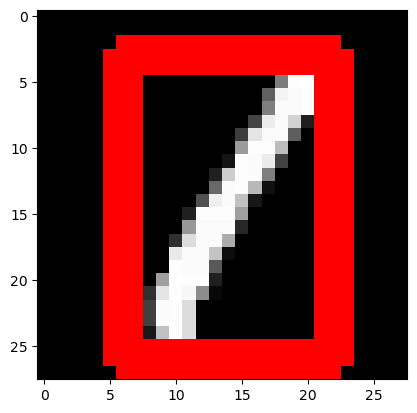

In [239]:
# returns the image
from matplotlib import pyplot as plt
plt.imshow(augmented['image'])

In [265]:
# does the same process for a small sized digit
image = cv2.imread(os.path.join('data', 'train', 'images', '69.png'))

In [266]:
with open(os.path.join('data', 'train', 'labels', '69.json'), 'r') as f:
    label = json.load(f)

In [267]:
print(label['shapes'][0]['points'])

[[160.83333333333334, 437.66666666666663], [258.61111111111114, 542.1111111111111]]


In [268]:
coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [269]:
image.shape

(842, 595, 3)

In [270]:
import numpy as np
# width, height, width, height
coords = list(np.divide(coords, (image.shape[1], image.shape[0], image.shape[1], image.shape[0])))

In [271]:
coords

[0.27030812324929976,
 0.5197941409342834,
 0.43464052287581706,
 0.6438374241224597]

In [248]:
augmented = augmentor(image = image, bboxes=[coords], class_labels = ['1 (one)'])

In [249]:
augmented['bboxes']

[(0.27030812324929976,
  0.5197941409342834,
  0.43464052287581706,
  0.6438374241224597)]

In [250]:
cv2.rectangle(augmented['image'],
              # width, height            
              tuple(np.multiply(augmented['bboxes'][0][:2], [image.shape[1], image.shape[0]]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [image.shape[1], image.shape[0]]).astype(int)),
              (255, 0, 0), 2)



array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

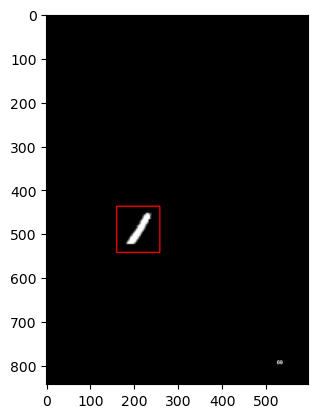

In [251]:
from matplotlib import pyplot as plt
plt.imshow(augmented['image'])

In [276]:
# copies the images to the augmented data folder which are going to be used for training.
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [img.shape[1], img.shape[0], img.shape[1], img.shape[0]]))

        try: 
            augmented = augmentor(image=img, bboxes=[coords], class_labels=['1 (one)'])
            cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.png'), augmented['image'])

            annotation = {}
            annotation['image'] = image

            if os.path.exists(label_path):
                if len(augmented['bboxes']) == 0: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 
                else: 
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = 1
            else: 
                annotation['bbox'] = [0,0,0,0]
                annotation['class'] = 0 


            with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type


In [4]:
import tensorflow as tf
# gets the images from training data folder and preprocesses it.
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.png', shuffle=False)
train_images = train_images.map(load_image)
# resizes it
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
# returns the value between 0 and 1
train_images = train_images.map(lambda x: x/255)

In [5]:
# gets the images from testing data folder and preprocesses it.
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.png', shuffle=False)
test_images = test_images.map(load_image)
# resizes it
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
# returns the value between 0 and 1
test_images = test_images.map(lambda x: x/255)

In [6]:
# gets the images from validation data folder and preprocesses it.
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.png', shuffle=False)
val_images = val_images.map(load_image)
# resizes it
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
# returns the value between 0 and 1
val_images = val_images.map(lambda x: x/255)

In [16]:
import json
# gets the label
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    return [label['class']], label['bbox']

In [17]:
# stores the training labels
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [18]:
# stores the testing labels
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [19]:
# stores the validation labels
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [20]:
# gets the 8 training image
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(200)
train = train.batch(8)
train = train.prefetch(4)

In [21]:
# gets the 8 testing image
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(50)
test = test.batch(8)
test = test.prefetch(4)

In [22]:
# gets the 8 validation image
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(50)
val = val.batch(8)
val = val.prefetch(4)

In [23]:
# stores the training data as numpy array
data_samples = train.as_numpy_iterator()

In [24]:
# gets the next element in the array
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


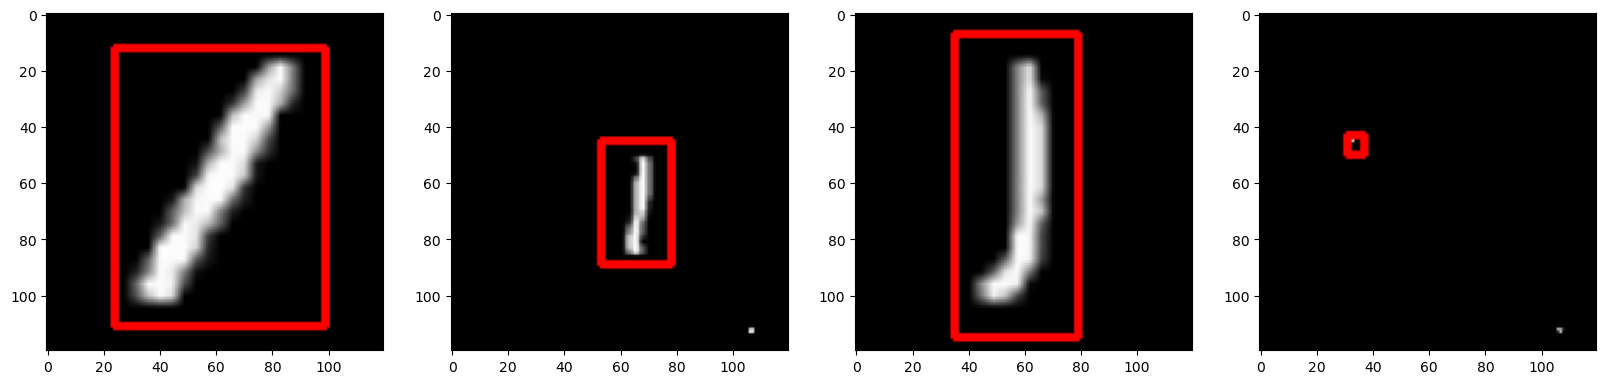

In [28]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
# shows the image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [29]:
# import the necessary dependencies for the model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [30]:
# VGG16 CNN model is used for recognition
vgg = VGG16(include_top=False)

In [31]:
# information about the VGG16
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [32]:
# model is developed
def build_model():
    input_layer = Input(shape=(120, 120, 3))
    vgg = VGG16(include_top=False)(input_layer)
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    digit_detector = Model(inputs = input_layer, outputs = [class2, regress2])
    return digit_detector

In [33]:
# model is assigned to the variable
digit_tracker = build_model()

In [34]:
# model summary
digit_tracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [35]:
# first variable stores the image
# second variable stores the bounding box values
X, y = train.as_numpy_iterator().next()

In [36]:
# image shape returned
X.shape

(8, 120, 120, 3)

In [37]:
# predictions made
classes, coords = digit_tracker.predict(X)

1/1 [==============================] - 1s 848ms/step


In [38]:
# classes and bounding boxes returned
classes, coords

(array([[0.43858957],
        [0.41069654],
        [0.41278687],
        [0.43101484],
        [0.4244831 ],
        [0.4364525 ],
        [0.42357504],
        [0.47835624]], dtype=float32),
 array([[0.44179225, 0.6740321 , 0.65370125, 0.3791789 ],
        [0.4889926 , 0.6481143 , 0.65946466, 0.36210197],
        [0.45310333, 0.6266855 , 0.6740219 , 0.38017803],
        [0.4674959 , 0.66772497, 0.6412223 , 0.37881118],
        [0.47020918, 0.65910256, 0.670323  , 0.38834512],
        [0.47828388, 0.6729715 , 0.69300467, 0.3824055 ],
        [0.4624627 , 0.6809786 , 0.6795659 , 0.39860338],
        [0.4646361 , 0.65415233, 0.65767807, 0.36948177]], dtype=float32))

In [39]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [40]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [41]:
# localisation loss is calculated
def localization_loss(y_true, yhat):  
    # y_true is the correct bounding box
    # yhat is the predicted bounding box
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
         
    # h_true is the true height
    # w_true is the true width
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    # h_pred is the predicted height
    # w_pred is the predicted width
    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size


In [42]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [43]:
# the next training data coordinates, and the predicted bounding box values of the X image is passed as input
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.857774>

In [44]:
# the next training data image, and the predicted class  of the X image is passed as input
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.84036374>

In [45]:
# the next training data coordinates, and the predicted bounding box values of the X image is passed as input
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.857774>

In [46]:
# method contains the training and testing methods
class Digit_Tracker(Model): 
    def __init__(self, digit_tracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = digit_tracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [47]:
# Digit Detector model is assigned to the 'model' variable
model = Digit_Tracker(digit_tracker)

In [48]:
# model is compiled
model.compile(opt, classloss, regressloss)

In [49]:
# model is trained with 50 epochs
hist = model.fit(train, epochs=50, validation_data=val)

Epoch 1/50
16/16 [==============================] - 31s 2s/step - total_loss: 1.2574 - class_loss: 0.1759 - regress_loss: 1.1695 - val_total_loss: 0.0315 - val_class_loss: 4.6971e-04 - val_regress_loss: 0.0312
Epoch 2/50
16/16 [==============================] - 28s 2s/step - total_loss: 0.2232 - class_loss: 0.0909 - regress_loss: 0.1777 - val_total_loss: 0.0382 - val_class_loss: 0.0309 - val_regress_loss: 0.0227
Epoch 3/50
16/16 [==============================] - 29s 2s/step - total_loss: 0.1512 - class_loss: 0.0814 - regress_loss: 0.1105 - val_total_loss: 0.0268 - val_class_loss: 0.0042 - val_regress_loss: 0.0246
Epoch 4/50
16/16 [==============================] - 30s 2s/step - total_loss: 0.1226 - class_loss: 0.0717 - regress_loss: 0.0868 - val_total_loss: 0.0110 - val_class_loss: 3.9121e-04 - val_regress_loss: 0.0108
Epoch 5/50
16/16 [==============================] - 31s 2s/step - total_loss: 0.1148 - class_loss: 0.0707 - regress_loss: 0.0795 - val_total_loss: 0.3590 - val_class_lo

16/16 [==============================] - 34s 2s/step - total_loss: 0.0030 - class_loss: 8.7309e-04 - regress_loss: 0.0025 - val_total_loss: 0.0098 - val_class_loss: 4.6790e-06 - val_regress_loss: 0.0098
Epoch 41/50
16/16 [==============================] - 34s 2s/step - total_loss: 0.0028 - class_loss: 8.0543e-04 - regress_loss: 0.0024 - val_total_loss: 0.0158 - val_class_loss: 1.4289e-04 - val_regress_loss: 0.0158
Epoch 42/50
16/16 [==============================] - 34s 2s/step - total_loss: 0.0024 - class_loss: 7.6331e-04 - regress_loss: 0.0021 - val_total_loss: 3.5165 - val_class_loss: 6.0254 - val_regress_loss: 0.5038
Epoch 43/50
16/16 [==============================] - 34s 2s/step - total_loss: 0.0025 - class_loss: 9.2785e-04 - regress_loss: 0.0020 - val_total_loss: 0.0114 - val_class_loss: 4.0829e-06 - val_regress_loss: 0.0114
Epoch 44/50
16/16 [==============================] - 34s 2s/step - total_loss: 0.0021 - class_loss: 6.8743e-04 - regress_loss: 0.0017 - val_total_loss: 0.01

In [50]:
hist.history

{'total_loss': [0.07647746801376343,
  0.051143474876880646,
  0.11254532635211945,
  0.021667033433914185,
  0.028074970468878746,
  0.01143413782119751,
  0.01203520130366087,
  0.008408882655203342,
  0.12215644121170044,
  0.007259620353579521,
  0.06571823358535767,
  0.11484570801258087,
  0.00635719858109951,
  0.009113126434385777,
  0.004080779384821653,
  0.005022812634706497,
  0.008371861651539803,
  0.007036139722913504,
  0.04197736829519272,
  0.0035217697732150555,
  0.005295104347169399,
  0.026937294751405716,
  0.004446097649633884,
  0.018658945336937904,
  0.016747023910284042,
  0.0020738933235406876,
  0.013138092122972012,
  0.0018200527410954237,
  0.011928165331482887,
  0.0016580348601564765,
  0.0014948046300560236,
  0.0010518983472138643,
  0.0019517389591783285,
  0.0006712605245411396,
  0.0024869386106729507,
  0.0023298023734241724,
  0.006438279524445534,
  0.001320226932875812,
  0.004762270487844944,
  0.0016665197908878326,
  0.001144883339293301,


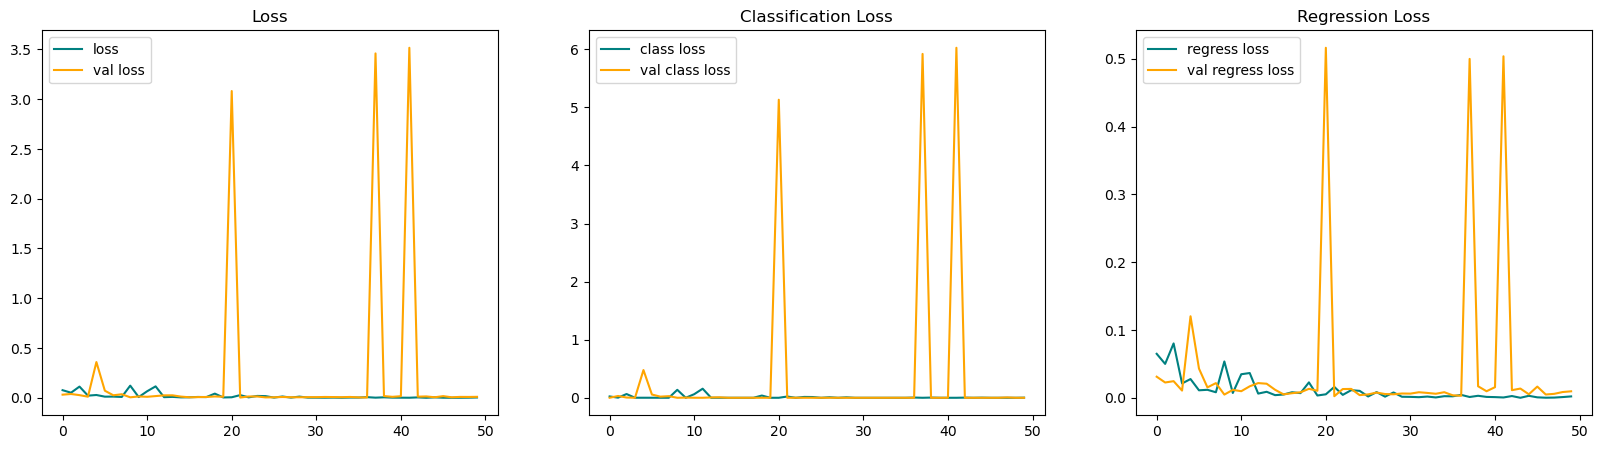

In [51]:
# Total loss, classification loss and regression loss graphics
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [52]:
test_data = test.as_numpy_iterator()

In [53]:
test_sample = test_data.next()

In [54]:
yhat = digit_tracker.predict(test_sample[0])

1/1 [==============================] - 1s 566ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


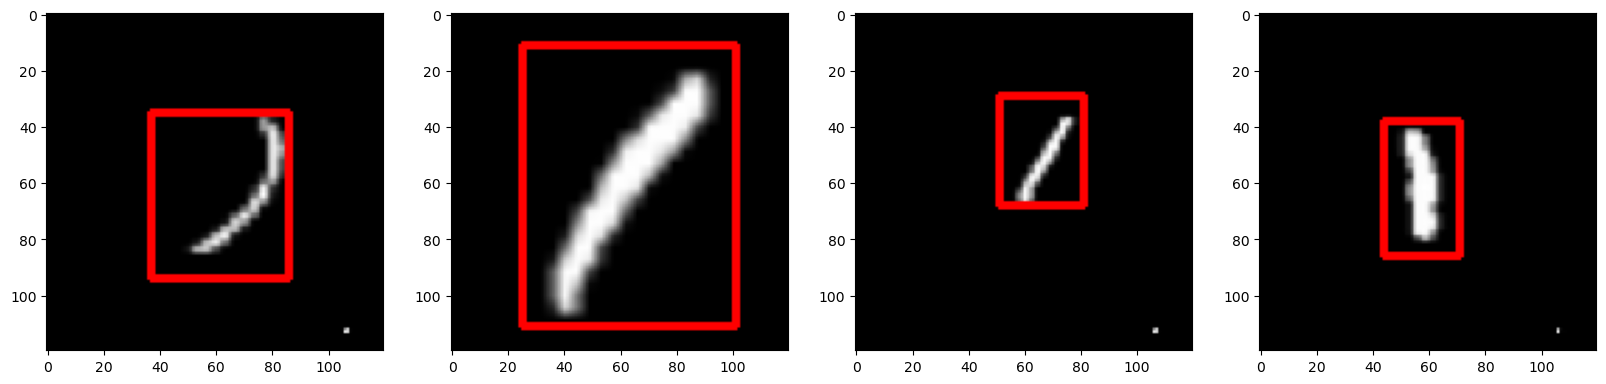

In [55]:
# shows the testing data predictions 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

1/1 [==============================] - 0s 90ms/step


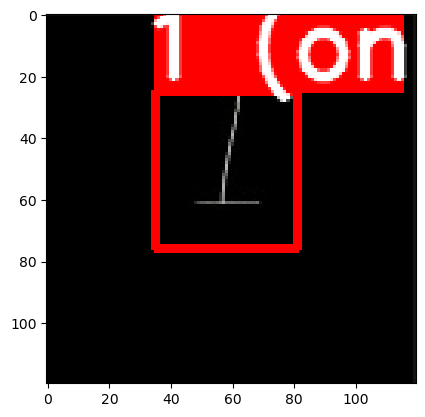

In [60]:
# first reads the image file, then converts white background to black and black digit to white. Resizes it to 120x120 pixels
# saves the image, divides the each of pixel values to 255
img = cv2.imread('one1.jpeg')
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

img = cv2.resize(img, (120, 120), interpolation = cv2.INTER_AREA)

cv2.imwrite('one1.jpeg', img)
    
img = cv2.imread('one1.jpeg')
# predictions made
yhat = digit_tracker.predict(np.expand_dims(img/255,0))
sample_coords = yhat[1][0]

# if the predicted classification rate is greater than 0.5, adds the localisation rectangle.
if yhat[0] > 0.5: 
    
    # adds rectangle around the digit
    cv2.rectangle(img, 
                  tuple(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [img.shape[1], img.shape[0]]).astype(int)), 
                  (255,0,0), 2)
    
    # label rectangle
    cv2.rectangle(img, 
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [0,-30])),
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [80,0])), 
                  (255,0,0), -1)

    # text of the classification
    cv2.putText(img, '1 (one)', tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [-5,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    plt.imshow(img)

1/1 [==============================] - 0s 125ms/step


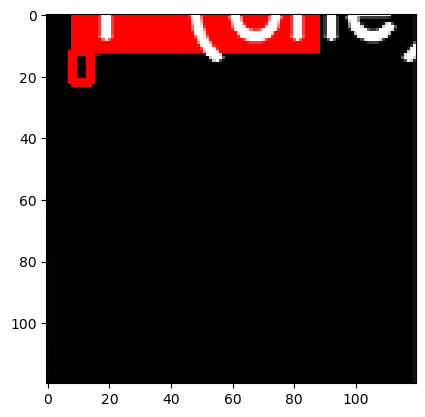

In [61]:
# same process as above
img = cv2.imread('one2.jpeg')
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

img = cv2.resize(img, (120, 120), interpolation = cv2.INTER_AREA)

cv2.imwrite('one2.jpeg', img)
    
img = cv2.imread('one2.jpeg')
yhat = digit_tracker.predict(np.expand_dims(img/255,0))
sample_coords = yhat[1][0]
    
if yhat[0] > 0.5: 
    # Controls the main rectangle
    cv2.rectangle(img, 
                  tuple(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [img.shape[1], img.shape[0]]).astype(int)), 
                  (255,0,0), 2)
    # Controls the label rectangle
    cv2.rectangle(img, 
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [0,-30])),
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [80,0])), 
                  (255,0,0), -1)

    # Controls the text rendered
    cv2.putText(img, '1 (one)', tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [0,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    plt.imshow(img)

1/1 [==============================] - 0s 139ms/step


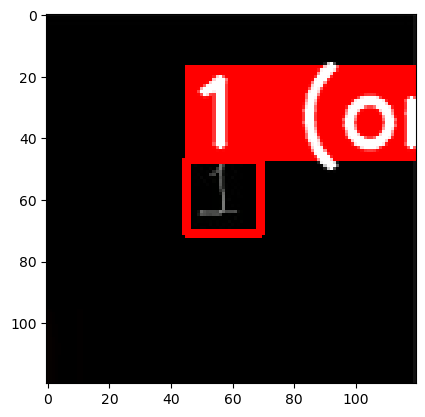

In [62]:
# same process as above
img = cv2.imread('one4.jpeg')
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

img = cv2.resize(img, (120, 120), interpolation = cv2.INTER_AREA)

cv2.imwrite('one4.jpeg', img)
    
img = cv2.imread('one4.jpeg')
yhat = digit_tracker.predict(np.expand_dims(img/255,0))
sample_coords = yhat[1][0]
    
if yhat[0] > 0.5: 
    # Controls the main rectangle
    cv2.rectangle(img, 
                  tuple(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [img.shape[1], img.shape[0]]).astype(int)), 
                  (255,0,0), 2)
    # Controls the label rectangle
    cv2.rectangle(img, 
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [0,-30])),
                  tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [80,0])), 
                  (255,0,0), -1)

    # Controls the text rendered
    cv2.putText(img, '1 (one)', tuple(np.add(np.multiply(sample_coords[:2], [img.shape[1], img.shape[0]]).astype(int), [0,-5])),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    plt.imshow(img)